In [1]:
import numpy as np
import scipy as sp
import pandas as pd
from matplotlib import pyplot as plt

%matplotlib inline

## questão 1

In [2]:
from scipy.cluster.hierarchy import dendrogram,linkage

In [3]:
# a matriz dada no exercício precisou ser expandida (espelhada)
# porque o python aparentemente precisa de entradas em todos os 
# elementos da matriz

a = np.array([[0,2,6,10,9],
              [2,0,5,9,8],
              [6,5,0,4,5],
              [10,9,4,0,3],
              [9,8,5,3,0]])

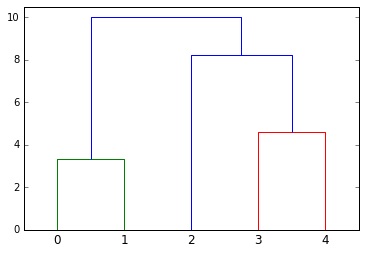

In [4]:
z = linkage(a,method="single")
d=dendrogram(z)

As alternativas **b** e **e** estão corretas:

- b) os objetos 1 e 2 formam o primeiro cluster não unitário

- e) o algoritmo produz uma sequência de partições unitárias

## questão 2

In [5]:
from sklearn.cluster import KMeans

In [6]:
X = np.array([[1,1],
              [1,2],
              [2,1],
              [2,2],
              [5,1],
              [6,1],
              [5,2]])

initial_centroids = np.array([[3,0],
                             [5,0]])

cluster = KMeans(
    n_clusters=2, # numero de clusters que eu quero
    init=initial_centroids, # centroides iniciais
    max_iter=5, # numero de iterações
    n_init=1 # numero de vezes que o algo. vai rodar
)

cluster.fit(X)

final_centroids = cluster.cluster_centers_

In [7]:
print(final_centroids)

[[ 1.5         1.5       ]
 [ 5.33333333  1.33333333]]


Os centróides finais obtidos são (1.5, 1.5) e (5.33, 5.33)

## questão 3

In [8]:
from sklearn.metrics.cluster import adjusted_rand_score

In [9]:
ground_truth = [1,2,1,2,2,1,2]
pred = [1,2,1,1,1,2,2]

print(adjusted_rand_score(ground_truth,pred))

-0.166666666667


## questão 4

A opção **d** é verdadeira. Nenhuma das alternativas está correta.

## questão 5

> estratégia: calcular $P(não|ensolarado, quente, normal, verdadeiro)$ e depois
calcular $P(sim|ensolarado, quente, normal, verdadeiro)$ e ver 
qual dos dois é mais alto.

$P(não|ensolarado,quente,normal,verdadeiro)=\frac{P(ensolarado, quente, normal, verdadeiro|não) * P(não)}{P(ensolarado, quente, normal, verdadeiro)}$

              
 e $P(ensolarado, quente, normal, verdadeiro)$ 
 é igual ao somatório de  $P(ensolarado, quente, normal, verdadeiro)$
 condicionado em "não" e condicionado em "sim"

asssumindo que as features são independentes entre si (hipótese ingênua), então $P(a,b) = P(a)P(b)$





In [10]:
# P(ensolarado, quente, normal, verdadeiro| não)

P_features_given_no_times_p_no = (3/5)* (5/14) + (3/5)*(5/14) + (1/5)*(5/14) + (3/5)*(5/14)

In [11]:
# P(ensolarado, quente, normal, verdadeiro| sim)

P_features_given_yes_times_p_yes = (2/9)*(9/15) + (2/9)*(9/15) + (6/9)*(9/15) + (3/9)*(9/15)


In [12]:
denominator = P_features_given_no_times_p_no + P_features_given_yes_times_p_yes

In [13]:
# probabilidade de NÃO
P_no_given_features = P_features_given_no_times_p_no / denominator
print(P_no_given_features)

0.45180722891566266


In [14]:
# probabilidade de SIM
P_yes_given_features = P_features_given_yes_times_p_yes / denominator
print(P_yes_given_features)

0.5481927710843373


A probabilidade $P(NÃO|features) = 0.452$ e $P(SIM|features)= 0.548$.

Logo, a classe mais provável é **SIM**.

## questão 6

In [15]:
from sklearn import tree
from sklearn import preprocessing

In [16]:
# preciso converter as features categóricas em números

# sexta/sábado: não/sim = 0,1
# faminto: não/sim = 0,1 
# clientes: cheio, nenhum, algum = 0,1,2
# tipo: tailandes,frances, hamburguer, italiano = 0,1,2,3
# espera: não/sim = 0,1

encoded = np.array([
    [0,1,0,0,0],
    [1,0,0,1,0],
    [0,0,1,2,0],
    [1,0,1,2,0],
    [1,1,0,3,0],
    [0,0,1,0,0],
    [0,1,2,1,1],
    [0,0,2,2,1],
    [1,1,0,0,1],
    [0,1,2,3,1],
    [0,1,2,0,1],
    [1,1,0,2,1]
])

X = encoded[:,:-1]
y = encoded[:,-1]
X.shape,y.shape

((12, 4), (12,))

In [17]:
# critério default é o coeficiente gini
clf = tree.DecisionTreeClassifier(criterion='entropy')
clf = clf.fit(X,y)

In [18]:
# item A
# [1,1,0,1] = [sim, sim, cheio, francês]
x_test = np.array([1,1,0,1]).reshape(1,-1)

clf.predict(x_test)

array([1])

a classe prevista é **1**, ou seja, espera=**SIM**

In [19]:
# item B
from sklearn.preprocessing import OneHotEncoder
from sklearn.neighbors import KNeighborsClassifier

# função de distância escolhida só funciona com features binárias,
# ou seja, one hot encoded.
enc = OneHotEncoder()
encoded_ohe = enc.fit_transform(encoded[:,:4]).todense()

# [1,1,1,3] = [sim,sim,alguns,italiano]
x_test = np.array([1,1,2,3]).reshape(1,-1)

test_ohe = enc.transform(x_test).todense()

# using "matching" metric to match what's been described in the
# test description
clf = KNeighborsClassifier(n_neighbors=3,metric="matching")

clf.fit(encoded_ohe,encoded[:,-1])

clf.predict(test_ohe)

array([1])

De acordo com o método kNN, a classe prevista para o caso de teste é **1**, ou seja, **espera=sim**.

## questão 7

## questão 8

## questão 9

## questão 10

- (V)
- (F) - Falso - o hdfs é o sistema de arquivos usado pelo hadoop
- (V) - Verdadeiro, mas o dialeto de SQL usado (HiveQL) não segue 100% o padrão SQL
- (V) - Verdadeiro, a menos que se use mais de um name node
- (V) - Verdadeiro, se o Spark for inicializado com suporte ao Hive
- (F) - Falso - há projetos que integram os dois, mas não de forma nativa
- (F) - Falso - essa funcionalidade é feita justamente para que se possa usar scripts feitos em qualquer linguagem pelo Hadoop
- (F) - Falso - o Hive tem um otimizador/planejador de consultas mas é possível otimizar a forma como as consultas são escritas, por exemplo usar GROUP BY primeiro por um atributo com cardinalidade alta, pois isso permite que o dado seja bem particionado, logo o job pode ser distribuído em vários nós.
-  (V) Verdadeiro - se o resultado de um passo do seu processo no Spark resultar em uma única partição,  Spark só vai conseguir utilizar um nó para processar o próximo passo. Uma alternativa é forçar um shuffle para que o dado seja re-particionado em várias partes novamente.
- (F) - Falso - o YARN também pode ser usado para gerenciar recursos de um cluster Hadoop